## Observations and Insights

In [1]:

# Observations:
#1. Male and female mice used for study is similar and this means there a good balance in study by gender.
#2. Other than Infubinol,no other top regimen has any outliers.
#3. The weight of mouse and tumor volume has positive correlation.

# Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_data = mouse_metadata.merge(study_results, on="Mouse ID", how='outer')

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group data by Drug Regimen
drug_grp = combine_data.groupby("Drug Regimen")

#mean
vol_mean = drug_grp['Tumor Volume (mm3)'].mean

#median
vol_median = drug_grp['Tumor Volume (mm3)'].median

#var
vol_var = drug_grp['Tumor Volume (mm3)'].var

#std
vol_std = drug_grp['Tumor Volume (mm3)'].std

#SEM
vol_sem = drug_grp['Tumor Volume (mm3)'].sem


summary_data = pd.DataFrame({"Volume Mean": vol_mean(),
                             "Volume Median": vol_median(),
                             "Volume Variance": vol_var(),
                             "Volume Std Dev": vol_std(),
                             "Volume SEM": vol_sem()})
summary_data



,Volume Mean,Volume Median,Volume Variance,Volume Std Dev,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

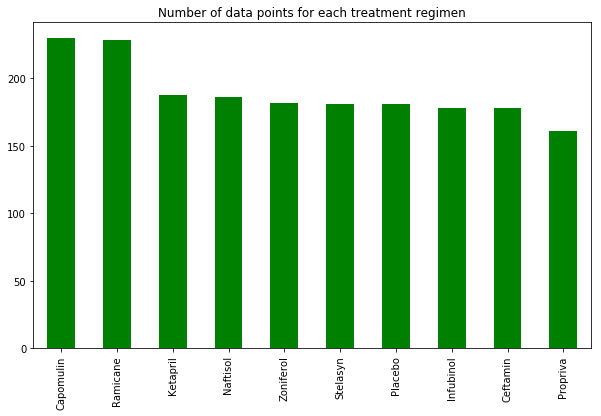

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_point = pd.DataFrame(combine_data['Drug Regimen'].value_counts())

data_point.plot(kind='bar', color="green", legend=False, figsize = (10,6), title="Number of data points for each treatment regimen" )

plt.show()

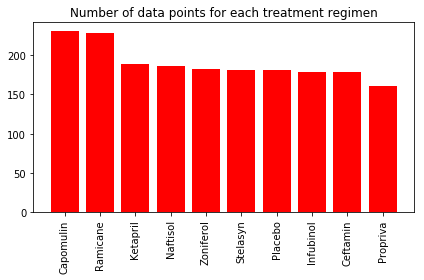

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(data_point.index, data_point['Drug Regimen'], width =0.8, color='red')
plt.xticks(rotation='vertical')
plt.title("Number of data points for each treatment regimen")
plt.tight_layout()


## Pie plots

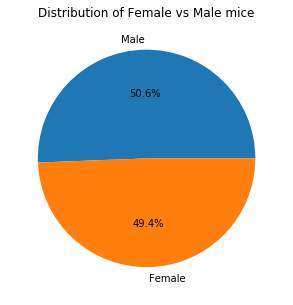

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = pd.DataFrame(combine_data['Sex'].value_counts())

sex_count.plot(kind='pie', y='Sex', autopct='%1.1f%%', legend=False, label="", figsize=(5, 5), title="Distribution of Female vs Male mice")

plt.show()

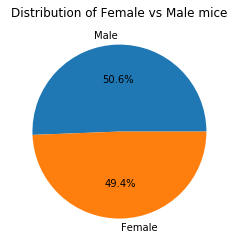

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_count['Sex'], labels=sex_count.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male mice")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. IQR and quantitatively determine if there are any potential outliers.

#groupby mouse id, then get .max and reset index. finally merge data
final_vol = combine_data.groupby("Mouse ID").max()
final_vol = final_vol.reset_index()
final_vol_merge = final_vol[["Mouse ID", "Timepoint"]].merge(combine_data, on=["Mouse ID","Timepoint"], how='inner')

Capomulin_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

Ramicane_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]

Infubinol_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]

Ceftamin_vol = final_vol_merge.loc[final_vol_merge["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

#IQR and outliers for each regimen

# IQR and outliers for Capomulin
cap_quartiles = Capomulin_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin outlier: {Capomulin_vol.loc[(Capomulin_vol <cap_lower_bound) | (Capomulin_vol > cap_upper_bound)]}")

#IQR and outliers for Ramicane
ram_quartiles = Ramicane_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane outlier: {Ramicane_vol.loc[(Ramicane_vol <ram_lower_bound) | (Ramicane_vol > ram_upper_bound)]}")

#IQR and outliers for Infubinol
inf_quartiles = Infubinol_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Inficane outlier: {Infubinol_vol.loc[(Infubinol_vol <inf_lower_bound) | (Infubinol_vol > inf_upper_bound)]}")

#IQR and outliers for Ceftamin
cef_quartiles = Ceftamin_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceficane outlier: {Ceftamin_vol.loc[(Ceftamin_vol <cef_lower_bound) | (Ceftamin_vol > cef_upper_bound)]}")



Capomulin outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Inficane outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceficane outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


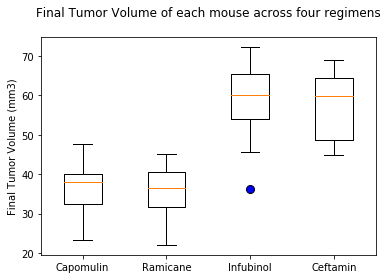

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [Capomulin_vol, Ramicane_vol, Infubinol_vol, Ceftamin_vol]
outlier_dict = dict(MarkerFaceColor='blue', MarkerSize=8)
plt.boxplot(data, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops  = outlier_dict )
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume of each mouse across four regimens\n")
plt.show()

## Line and scatter plots

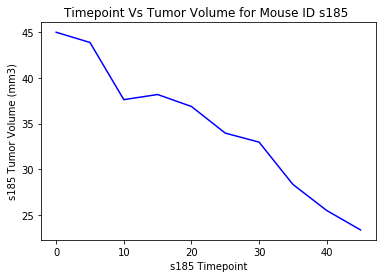

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_treated = combine_data[(combine_data["Drug Regimen"] == "Capomulin") & (combine_data["Mouse ID"] == "s185")]
plt.plot(mouse_treated["Timepoint"], mouse_treated["Tumor Volume (mm3)"], color="blue", label="World Average" )
plt.xlabel("s185 Timepoint")
plt.ylabel("s185 Tumor Volume (mm3)")
plt.title("Timepoint Vs Tumor Volume for Mouse ID s185 ")
plt.show()

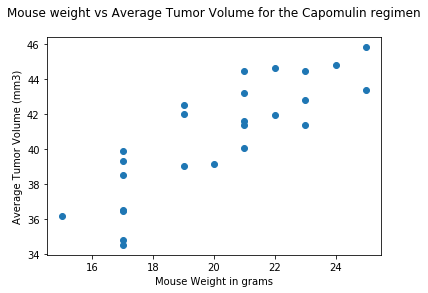

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_df = combine_data[(combine_data["Drug Regimen"] == "Capomulin")]
mouse_df_grp = mouse_df.groupby("Mouse ID").mean()
plt.scatter(mouse_df_grp["Weight (g)"], mouse_df_grp["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse weight vs Average Tumor Volume for the Capomulin regimen\n")
plt.show()

The correlation between both factors is 0.84


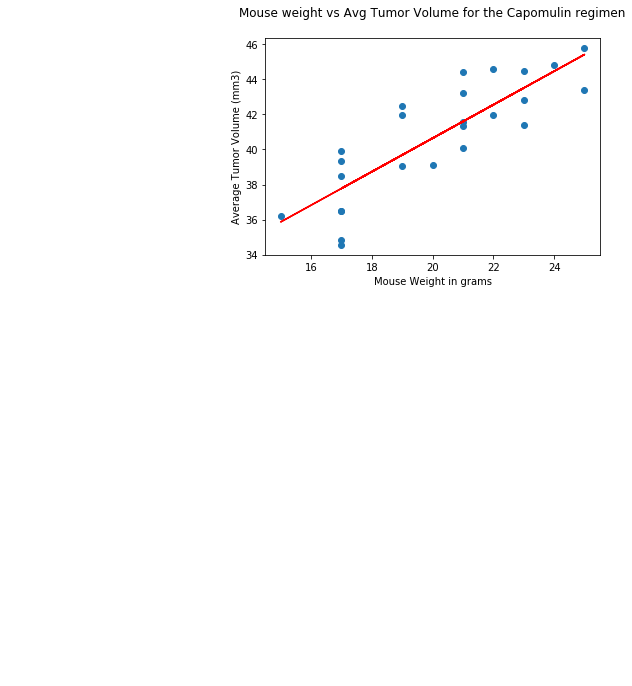

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_df_grp["Weight (g)"], mouse_df_grp["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
from scipy.stats import linregress
x_values = mouse_df_grp["Weight (g)"]
y_values = mouse_df_grp["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse weight vs Avg Tumor Volume for the Capomulin regimen\n")
plt.show()
